In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import glob 
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df_bitcoin=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Bitcoin.csv") 
df_ethereum=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Ethereum.csv")


In [3]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_ethereum['Date'] = pd.to_datetime(df_ethereum['Date'])

df_merged = pd.merge(df_bitcoin, df_ethereum, on='Date', suffixes=('_btc', '_eth'))
btc_precio = df_merged['High_btc']
eth_precio = df_merged['High_eth']

corr, _ = pearsonr(btc_precio, eth_precio)
print(f"Coeficiente  entre BTC y ETH: {corr}")

Coeficiente  entre BTC y ETH: 0.9029174879246602


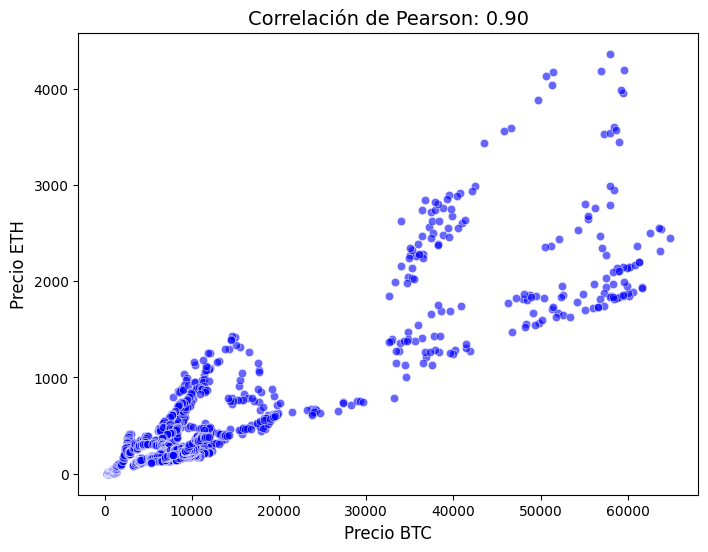

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=btc_precio, y=eth_precio, color='blue', alpha=0.6)
plt.title(f'Correlación de Pearson: {corr:.2f}', fontsize=14)
plt.xlabel('Precio BTC', fontsize=12)
plt.ylabel('Precio ETH', fontsize=12)
plt.show()

In [5]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_ethereum['Date'] = pd.to_datetime(df_ethereum['Date'])
df_merged = pd.merge(df_bitcoin, df_ethereum, on='Date', suffixes=('_btc', '_eth'))
df_merged['btc_change'] = df_merged['Close_btc'].diff()
df_merged['eth_change'] = df_merged['Close_eth'].diff()

btc_up_dates = df_merged[df_merged['btc_change'] > 0]['Date']
eth_up_dates = df_merged[df_merged['eth_change'] > 0]['Date']

time_diffs = []
for btc_date in btc_up_dates:
    nearest_eth_date = eth_up_dates.iloc[(eth_up_dates - btc_date).abs().argmin()]
    time_diff = abs((nearest_eth_date - btc_date).days)
    time_diffs.append({'BTC Date': btc_date, 'ETH Date': nearest_eth_date, 'Tiempo de diferencia (dias)': time_diff})

time_diffs_df = pd.DataFrame(time_diffs)
print(time_diffs_df)

                BTC Date            ETH Date  Tiempo de diferencia (dias)
0    2015-08-09 23:59:59 2015-08-10 23:59:59                            1
1    2015-08-11 23:59:59 2015-08-11 23:59:59                            0
2    2015-08-14 23:59:59 2015-08-14 23:59:59                            0
3    2015-08-19 23:59:59 2015-08-19 23:59:59                            0
4    2015-08-20 23:59:59 2015-08-20 23:59:59                            0
...                  ...                 ...                          ...
1187 2021-06-29 23:59:59 2021-06-29 23:59:59                            0
1188 2021-07-02 23:59:59 2021-07-02 23:59:59                            0
1189 2021-07-03 23:59:59 2021-07-03 23:59:59                            0
1190 2021-07-04 23:59:59 2021-07-04 23:59:59                            0
1191 2021-07-06 23:59:59 2021-07-06 23:59:59                            0

[1192 rows x 3 columns]
